In [1]:
# First cell - Import libraries and setup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import string
import nltk
import re
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import plotly.express as px

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Second cell - Load Data
# COVID-19 Data
covid_df3 = pd.read_csv('/kaggle/input/covid19-twitter-dataset/Covid-19 Twitter Dataset (Apr-Jun 2021).csv')

# Combine COVID datasets
covid_df = pd.concat([covid_df3], ignore_index=True)

# Monkeypox Data
# Original monkeypox dataset
mpox_files = glob.glob('/kaggle/input/monkeypox-tweets/*.csv')
mpox_df1 = pd.concat(map(pd.read_csv, mpox_files), ignore_index=True)

# New monkeypox dataset
mpox_df2 = pd.read_csv('/kaggle/input/tweets-on-monkeypox/monkeypox.csv')

# New monkeypox dataset
mpox_df3 = pd.read_csv('/kaggle/input/monkeypox-tweets-data/monkeypox_tweets.csv')

# Combine monkeypox datasets
mpox_df = pd.concat([mpox_df1, mpox_df2, mpox_df3], ignore_index=True)

print("COVID-19 Dataset Shape:", covid_df.shape)
print("Monkeypox Dataset Shape:", mpox_df.shape)

COVID-19 Dataset Shape: (147475, 17)
Monkeypox Dataset Shape: (106638, 40)


In [3]:
import pandas as pd
import glob

# Monkeypox Data
# Original monkeypox dataset - Add prefix to column names for each file
mpox_files = glob.glob('/kaggle/input/monkeypox-tweets/*.csv')
mpox_dfs = []
for idx, file in enumerate(mpox_files):
    df = pd.read_csv(file)
    df.columns = [f"file{idx}_{col}" for col in df.columns]  # Add dynamic 'fileX_' prefix
    mpox_dfs.append(df)
mpox_df1 = pd.concat(mpox_dfs, ignore_index=True)

# New monkeypox datasets - Add dynamic prefixes
mpox_df2 = pd.read_csv('/kaggle/input/tweets-on-monkeypox/monkeypox.csv')
mpox_df2.columns = [f"file{len(mpox_files)}_{col}" for col in mpox_df2.columns]  # Add 'fileX_' prefix

mpox_df3 = pd.read_csv('/kaggle/input/monkeypox-tweets-data/monkeypox_tweets.csv')
mpox_df3.columns = [f"file{len(mpox_files)+1}_{col}" for col in mpox_df3.columns]  # Add 'fileX_' prefix

# Combine monkeypox datasets
mpox_df = pd.concat([mpox_df1, mpox_df2, mpox_df3], ignore_index=True)

# Print dataset shapes and sample of column names to verify

print("Monkeypox Dataset Shape:", mpox_df.shape)
print("\nMpox DataFrame Columns:")
print(mpox_df.columns.tolist())  # Display column names to verify the prefixes


Monkeypox Dataset Shape: (106638, 212)

Mpox DataFrame Columns:
['file0_Unnamed: 0', 'file0_date', 'file0_time', 'file0_id', 'file0_tweet', 'file0_language', 'file0_replies_count', 'file0_retweets_count', 'file0_likes_count', 'file1_Unnamed: 0', 'file1_date', 'file1_time', 'file1_id', 'file1_tweet', 'file1_language', 'file1_replies_count', 'file1_retweets_count', 'file1_likes_count', 'file2_Unnamed: 0', 'file2_date', 'file2_time', 'file2_id', 'file2_tweet', 'file2_language', 'file2_replies_count', 'file2_retweets_count', 'file2_likes_count', 'file3_Unnamed: 0', 'file3_date', 'file3_time', 'file3_id', 'file3_tweet', 'file3_language', 'file3_replies_count', 'file3_retweets_count', 'file3_likes_count', 'file4_Unnamed: 0', 'file4_date', 'file4_time', 'file4_id', 'file4_tweet', 'file4_language', 'file4_replies_count', 'file4_retweets_count', 'file4_likes_count', 'file5_Unnamed: 0', 'file5_date', 'file5_time', 'file5_id', 'file5_tweet', 'file5_language', 'file5_replies_count', 'file5_retweet

In [4]:
# Third cell - Part 1: Check column names
print("COVID-19 DataFrame Columns:")
print(covid_df.columns.tolist())
print("\nMonkeypox DataFrame Columns:")
print(mpox_df.columns.tolist())

COVID-19 DataFrame Columns:
['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count', 'retweet_count', 'original_author', 'hashtags', 'user_mentions', 'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment']

Monkeypox DataFrame Columns:
['file0_Unnamed: 0', 'file0_date', 'file0_time', 'file0_id', 'file0_tweet', 'file0_language', 'file0_replies_count', 'file0_retweets_count', 'file0_likes_count', 'file1_Unnamed: 0', 'file1_date', 'file1_time', 'file1_id', 'file1_tweet', 'file1_language', 'file1_replies_count', 'file1_retweets_count', 'file1_likes_count', 'file2_Unnamed: 0', 'file2_date', 'file2_time', 'file2_id', 'file2_tweet', 'file2_language', 'file2_replies_count', 'file2_retweets_count', 'file2_likes_count', 'file3_Unnamed: 0', 'file3_date', 'file3_time', 'file3_id', 'file3_tweet', 'file3_language', 'file3_replies_count', 'file3_retweets_count', 'file3_likes_count', 'file4_Unnamed: 0', 'file4_date', 'file4_time', 'file4_id', 'file4_tweet', 'file4_langua

In [5]:
'''print("\nMpox DataFrame Columns:")
for column in mpox_df.columns:
    print(column)'''

'print("\nMpox DataFrame Columns:")\nfor column in mpox_df.columns:\n    print(column)'

In [6]:
print('Rows and columns in training dataset covid : ',covid_df.shape)
print('Rows and columns in training dataset mpox : ',mpox_df.shape)
print("Monkeypox Dataset Shape:", mpox_df.shape)

Rows and columns in training dataset covid :  (147475, 17)
Rows and columns in training dataset mpox :  (106638, 212)
Monkeypox Dataset Shape: (106638, 212)


In [7]:
print('Rows and columns in training dataset mpox : ',mpox_df.shape)

Rows and columns in training dataset mpox :  (106638, 212)


In [8]:
# Rename 'file16_text' to 'processed_file16_text'
mpox_df.rename(columns={'file17_text': 'file17_tweet'}, inplace=True)

'''print("\nMonkeypox DataFrame Columns:")
for column in mpox_df.columns:
    print(column)'''

'print("\nMonkeypox DataFrame Columns:")\nfor column in mpox_df.columns:\n    print(column)'

In [9]:
print('Rows and columns in training dataset covid : ',covid_df.shape)
print('Rows and columns in training dataset mpox : ',mpox_df.shape)

Rows and columns in training dataset covid :  (147475, 17)
Rows and columns in training dataset mpox :  (106638, 212)


In [10]:
import nltk
import re
import emoji
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    """Clean and preprocess text data comprehensively."""
    try:
        # Step 1: Convert to lowercase and string format
        text = str(text).lower()

        # Step 2: Normalize Unicode text
        text = unicodedata.normalize('NFKC', text).encode('ascii', 'ignore').decode('utf-8')

        # Step 3: Convert emojis to text
        text = emoji.demojize(text)

        # Step 4: Define unwanted patterns
        unwanted_patterns = [
            r'Ã³', r'±', r'à¤•', r'à¤¨', r'à¤²', r'à¤¹à¤²à¤•', r'à¤®', r'à¤•à¤ªà¤¯à¤Ÿà¤°',
            r'à¤µ', r'à¤•à¤«', r'à¤®à¤¶à¤¨', r'à¤¸', r'à¤­', r'à¤«à¤²', r'à¤¸à¤•à¤¤', r'à¤¹',
            r'à¤µà¤¯à¤°à¤¸', r'à¤¸à¤•à¤°à¤®à¤¤', r'à¤µà¤¯à¤•à¤¤', r'à¤œà¤¨à¤µà¤°',
            r'à¤¸', r'à¤°à¤¹', r'Ãª', r'Ã©', r'Ø³Ø¬Ù„Øª Ø¥ÙŠØ·Ø§Ù„ÙŠØ§ Ø§Ù„ÙŠÙˆÙ…',
            r'TÃ¼', r'bÃ¼yÃ¼tmÃ¼ÅŸ', r'Ã§Ã', r'oÃ¹', r'Ãº', r'Ã¨', r'nan'
        ]

        # Step 5: Remove unwanted patterns using regex
        for pattern in unwanted_patterns:
            text = re.sub(pattern, '', text)

        # Step 6: Remove URLs, mentions, and hashtags
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # URLs
        text = re.sub(r'@\w+', '', text)  # Mentions
        text = re.sub(r'#\w+', '', text)  # Hashtags

        # Step 7: Remove punctuations and numeric words
        text = re.sub(r'[^\w\s]', '', text)  # Punctuations
        text = re.sub(r'\w*\d\w*', '', text)  # Words with numbers

        # Step 8: Tokenize text
        tokens = word_tokenize(text)

        # Step 9: Remove stopwords
        stop_words = set(stopwords.words('english'))
        custom_stopwords = {
            'rt', 'amp', 'via', 'like', 'get', 'would', 'also', 'covid',
            'covid19', 'coronavirus', 'corona', 'virus', 'monkeypox', 'mpox',
            'pox', 'monkey'
        }
        stop_words.update(custom_stopwords)
        tokens = [word for word in tokens if word not in stop_words]

        # Step 10: Reconstruct the cleaned text
        text = ' '.join(tokens).strip()

        return text
    except Exception as e:
        print(f"Error in text preprocessing: {str(e)}")
        return text
        

print("Applying enhanced preprocessing with emoji conversion, hashtag, mention, and stopword removal...")

# List of columns to preprocess
covid_columns_to_process = ['clean_tweet']
mpox_columns_to_process = ['file0_tweet', 'file1_tweet', 'file2_tweet', 'file3_tweet', 'file4_tweet',
                           'file5_tweet', 'file6_tweet', 'file7_tweet', 'file8_tweet', 'file9_tweet',
                           'file10_tweet', 'file11_tweet', 'file12_tweet', 'file13_tweet', 'file14_tweet',
                           'file15_tweet', 'file17_tweet', 'file16_tweet']

# Apply preprocessing to multiple columns
for col in covid_columns_to_process:
    covid_df[f'processed_{col}'] = covid_df[col].apply(preprocess_text)

for col in mpox_columns_to_process:
    mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text)

print("\nSample COVID processed text:")
print(covid_df[[f'processed_{col}' for col in covid_columns_to_process]].head())

print("\nSample Monkeypox processed text:")
print(mpox_df[[f'processed_{col}' for col in mpox_columns_to_process]].head())

Applying enhanced preprocessing with emoji conversion, hashtag, mention, and stopword removal...


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_36/3114219200.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text)
/tmp/ipykernel_36/3114219200.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text


Sample COVID processed text:
                               processed_clean_tweet
0  work close indian govern rapidli deploy addit ...
1        flip flop fauci admit outdoor transmiss low
2  hi twitter tim man white hous suppli coordin l...
3  pray countri battl worst surg world wit let ir...
4        rapid invest nurs strengthen global respons

Sample Monkeypox processed text:
                               processed_file0_tweet processed_file1_tweet  \
0  theyre useful vice lords black gangster discip...                         
1                         explainer research roundup                         
2  hocl makersim learning basic chem stung twice ...                         
3   la lleg la comunidad gay porn star tuitera limea                         
4  many see us one advanced countries world yet l...                         

  processed_file2_tweet processed_file3_tweet processed_file4_tweet  \
0                                                                     
1      

/tmp/ipykernel_36/3114219200.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text)


In [11]:
# Combine all processed text columns into a single column for COVID dataset
covid_df['processed_text_covid'] = covid_df[[f'processed_{col}' for col in covid_columns_to_process]].apply(lambda row: ' '.join(row.values), axis=1)

print("\nSample combined processed text for COVID dataset:")
print(covid_df['processed_text_covid'].head())

# Combine all processed text columns into a single column for Monkeypox dataset
mpox_df['processed_text_mpox'] = mpox_df[[f'processed_{col}' for col in mpox_columns_to_process]].apply(lambda row: ' '.join(row.values), axis=1)

print("\nSample combined processed text for Monkeypox dataset:")
print(mpox_df['processed_text_mpox'].head())



Sample combined processed text for COVID dataset:
0    work close indian govern rapidli deploy addit ...
1          flip flop fauci admit outdoor transmiss low
2    hi twitter tim man white hous suppli coordin l...
3    pray countri battl worst surg world wit let ir...
4          rapid invest nurs strengthen global respons
Name: processed_text_covid, dtype: object

Sample combined processed text for Monkeypox dataset:
0    theyre useful vice lords black gangster discip...
1          explainer research roundup                 
2    hocl makersim learning basic chem stung twice ...
3    la lleg la comunidad gay porn star tuitera lim...
4    many see us one advanced countries world yet l...
Name: processed_text_mpox, dtype: object


/tmp/ipykernel_36/3263498616.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['processed_text_mpox'] = mpox_df[[f'processed_{col}' for col in mpox_columns_to_process]].apply(lambda row: ' '.join(row.values), axis=1)


In [12]:
# Save the combined processed text columns to CSV files
covid_df[['processed_text_covid']].to_csv('/kaggle/working/combined_processed_covid_tweets.csv', index=False)
mpox_df[['processed_text_mpox']].to_csv('/kaggle/working/combined_processed_mpox_tweets.csv', index=False)

print("Combined processed text files have been saved to CSV.")

Combined processed text files have been saved to CSV.


In [13]:
print('Rows and columns in training dataset covid : ',covid_df.shape)
print('Rows and columns in training dataset mpox : ',mpox_df.shape)

Rows and columns in training dataset covid :  (147475, 19)
Rows and columns in training dataset mpox :  (106638, 231)


Top 10 Most Common Words:
[('vaccin', 30507), ('new', 12009), ('case', 11608), ('peopl', 8467), ('pandem', 6424), ('death', 6365), ('health', 6139), ('india', 6095), ('report', 6007), ('test', 5687)]


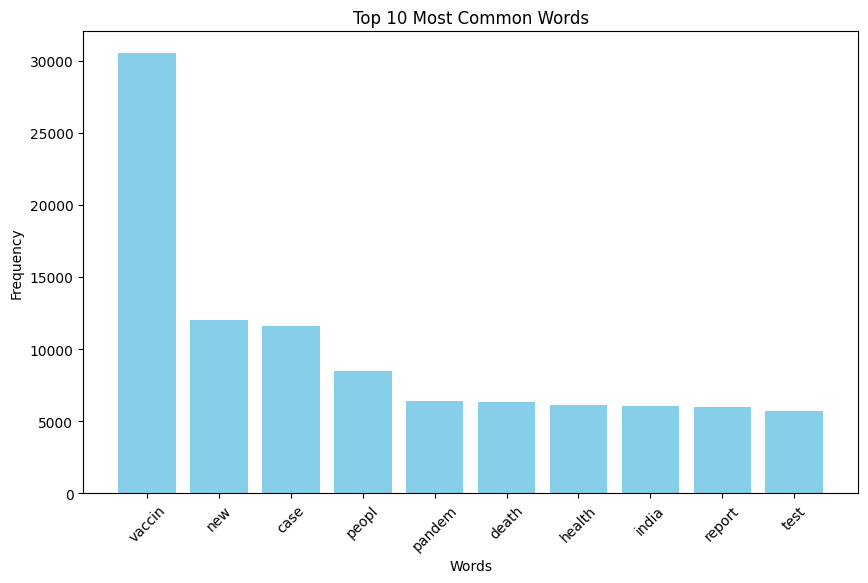

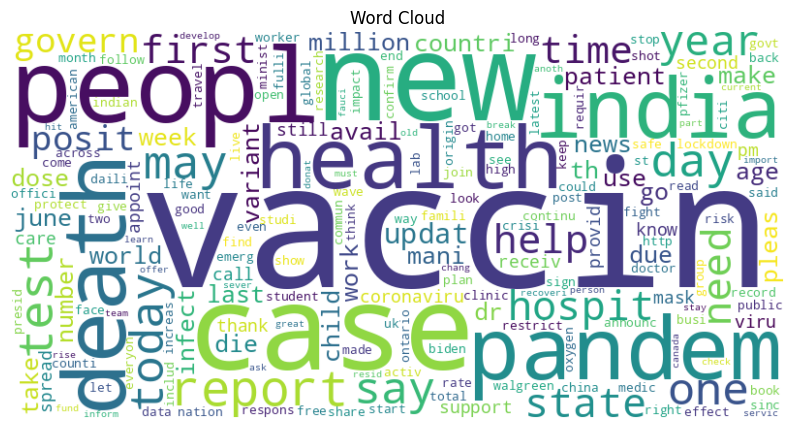

,Common_words,Frequency
0,vaccin,30507
1,new,12009
2,case,11608
3,peopl,8467
4,pandem,6424
5,death,6365
6,health,6139
7,india,6095
8,report,6007
9,test,5687


In [14]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk


# Sample dataset (replace this with your dataset)
covid_df['processed_text_covid']

# Function to calculate word frequency
def calculate_word_frequency(text_series):
    """Calculate word frequency from a pandas series of text."""
    all_words = []
    for text in text_series:
        words = word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
        all_words.extend(words)
    
    return Counter(all_words)

# Calculate word frequency
word_frequency = calculate_word_frequency(covid_df['processed_text_covid'])

# Display the 10 most common words
print("Top 10 Most Common Words:")
print(word_frequency.most_common(10))

# Create a bar plot of the top 10 words
top_words = word_frequency.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Tokenize and count word frequencies
covid_df['temp'] = covid_df['processed_text_covid'].apply(lambda x: str(x).split())
top = Counter([item for sublist in covid_df['temp'] for item in sublist])

# Create DataFrame for top 10 words
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words', 'Frequency']

# Display with gradient styling
temp_styled = temp.style.background_gradient(cmap='Purples')
temp_styled

Top 10 Most Common Words:
[('cases', 8485), ('vaccine', 8072), ('de', 6407), ('health', 6134), ('people', 5906), ('new', 5650), ('us', 5472), ('case', 4598), ('first', 4398), ('gay', 4100)]


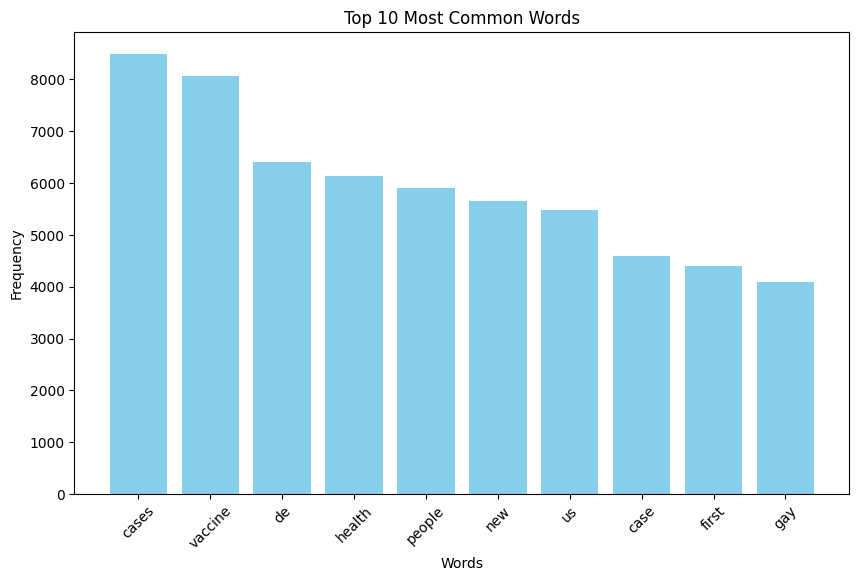

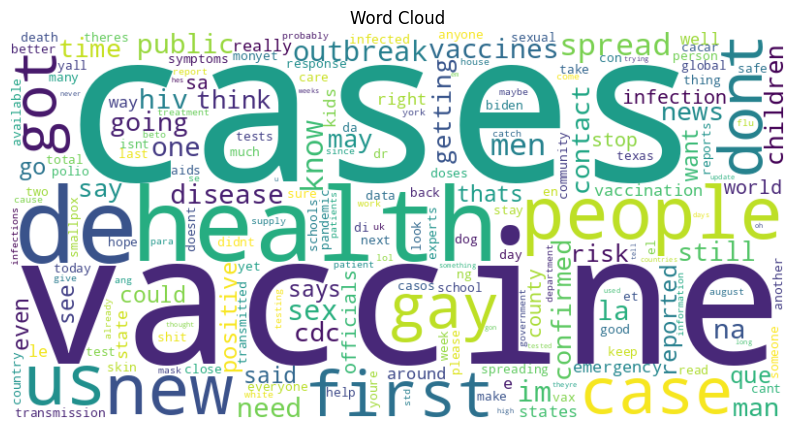

/tmp/ipykernel_36/597264567.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['temp'] = mpox_df['processed_text_mpox'].apply(lambda x: str(x).split())


,Common_words,Frequency
0,cases,8482
1,vaccine,8071
2,de,6407
3,health,6134
4,people,5906
5,new,5649
6,us,5471
7,case,4597
8,first,4398
9,gay,4100


In [15]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk


# Sample dataset (replace this with your dataset)
mpox_df['processed_text_mpox']

# Function to calculate word frequency
def calculate_word_frequency(text_series):
    """Calculate word frequency from a pandas series of text."""
    all_words = []
    for text in text_series:
        words = word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
        all_words.extend(words)
    
    return Counter(all_words)

# Calculate word frequency
word_frequency = calculate_word_frequency(mpox_df['processed_text_mpox'])

# Display the 10 most common words
print("Top 10 Most Common Words:")
print(word_frequency.most_common(10))

# Create a bar plot of the top 10 words
top_words = word_frequency.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Tokenize and count word frequencies
mpox_df['temp'] = mpox_df['processed_text_mpox'].apply(lambda x: str(x).split())
top = Counter([item for sublist in mpox_df['temp'] for item in sublist])

# Create DataFrame for top 10 words
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words', 'Frequency']

# Display with gradient styling
temp_styled = temp.style.background_gradient(cmap='Purples')
temp_styled

DATA_PROCESSING_COVID

In [16]:
# Import dependencies
from transformers import pipeline
import numpy as np
import pandas as pd
from tqdm import tqdm

# ===============================
# Load GoEmotions Pipeline
# ===============================
classifier = pipeline(
    "text-classification", 
    model="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True
)

# Emotion → Sentiment Mapping
positive_emotions = {'admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief'}
negative_emotions = {'anger', 'annoyance', 'confusion', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness'}
neutral_emotions = {'curiosity', 'realization', 'surprise', 'neutral'}

def get_goemotion_sentiment(text):
    try:
        text = str(text)
        if len(text) < 2:
            return 0.0, 'neutral'
        
        result = classifier(text)[0]
        emotion_scores = {entry['label']: entry['score'] for entry in result}

        pos_score = sum(emotion_scores.get(e, 0) for e in positive_emotions)
        neg_score = sum(emotion_scores.get(e, 0) for e in negative_emotions)
        neu_score = sum(emotion_scores.get(e, 0) for e in neutral_emotions)

        # Decide sentiment label
        if max(pos_score, neg_score, neu_score) == pos_score:
            sentiment = 'positive'
        elif max(pos_score, neg_score, neu_score) == neg_score:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'

        # Optionally return polarity score (pos - neg)
        polarity = pos_score - neg_score
        return polarity, sentiment

    except Exception as e:
        print(f"Error: {str(e)}")
        return 0.0, 'neutral'

# ===============================
# Apply Sentiment Analysis
# ===============================

print("Applying GoEmotions sentiment analysis (emotion to sentiment)...")
batch_size = 32

# COVID tweets
covid_results = []
for i in tqdm(range(0, len(covid_df), batch_size), desc="Processing COVID tweets"):
    batch = covid_df['processed_text_covid'].iloc[i:i+batch_size]
    results = [get_goemotion_sentiment(text) for text in batch]
    covid_results.extend(results)
covid_df['covid_polarity'], covid_df['covid_sentiment'] = zip(*covid_results)

# MPOX tweets
mpox_results = []
for i in tqdm(range(0, len(mpox_df), batch_size), desc="Processing Monkeypox tweets"):
    batch = mpox_df['processed_text_mpox'].iloc[i:i+batch_size]
    results = [get_goemotion_sentiment(text) for text in batch]
    mpox_results.extend(results)
mpox_df['mpox_polarity'], mpox_df['mpox_sentiment'] = zip(*mpox_results)

print("\nSentiment analysis complete!")

# ===============================
# (Optional) Save Results
# ===============================
# covid_df.to_csv("covid_goemotion_sentiment_output.csv", index=False)
# mpox_df.to_csv("mpox_goemotion_sentiment_output.csv", index=False)


2025-07-17 21:29:44.656343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752787784.862453      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752787784.924129      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Applying GoEmotions sentiment analysis (emotion to sentiment)...


Processing Monkeypox tweets: 100%|██████████| 3333/3333 [08:14<00:00,  6.74it/s]



Sentiment analysis complete!


/tmp/ipykernel_36/4137360279.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['mpox_polarity'], mpox_df['mpox_sentiment'] = zip(*mpox_results)
/tmp/ipykernel_36/4137360279.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['mpox_polarity'], mpox_df['mpox_sentiment'] = zip(*mpox_results)


DATA_PROCESSING_MONKEYPOX

In [17]:
'''# Specify the columns to save
columns_to_save = ['processed_text_mpox', 'mpox_sentiment']

# Save the DataFrame to a CSV file in the Kaggle working directory
output_file = '/kaggle/working/janmpoxx_sentiment_analysis.csv'
mpox_df[columns_to_save].to_csv(output_file, index=False)

print(f"Sentiment analysis results saved to {output_file}")'''


'# Specify the columns to save\ncolumns_to_save = [\'processed_text_mpox\', \'mpox_sentiment\']\n\n# Save the DataFrame to a CSV file in the Kaggle working directory\noutput_file = \'/kaggle/working/janmpoxx_sentiment_analysis.csv\'\nmpox_df[columns_to_save].to_csv(output_file, index=False)\n\nprint(f"Sentiment analysis results saved to {output_file}")'

Sentiment Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


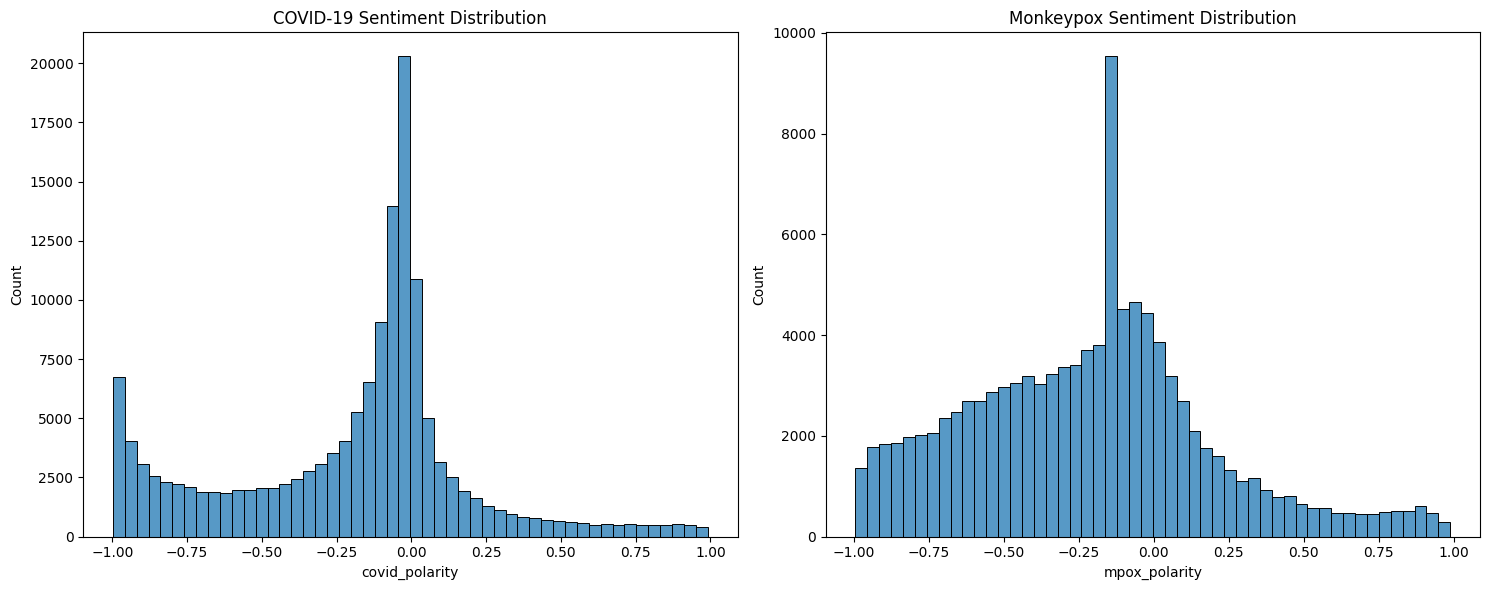


COVID-19 Sentiment Distribution:
covid_sentiment
neutral     0.690185
negative    0.250815
positive    0.059000
Name: proportion, dtype: float64

Monkeypox Sentiment Distribution:
mpox_sentiment
negative    0.688113
positive    0.218524
neutral     0.093363
Name: proportion, dtype: float64


In [18]:
# Seventh cell - Sentiment Distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=covid_df, x='covid_polarity', bins=50)
plt.title('COVID-19 Sentiment Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=mpox_df, x='mpox_polarity', bins=50)
plt.title('Monkeypox Sentiment Distribution')

plt.tight_layout()
plt.show()

# Print sentiment statistics
print("\nCOVID-19 Sentiment Distribution:")
print(covid_df['covid_sentiment'].value_counts(normalize=True))

print("\nMonkeypox Sentiment Distribution:")
print(mpox_df['mpox_sentiment'].value_counts(normalize=True))

Sentiment Distribution(pieChart)

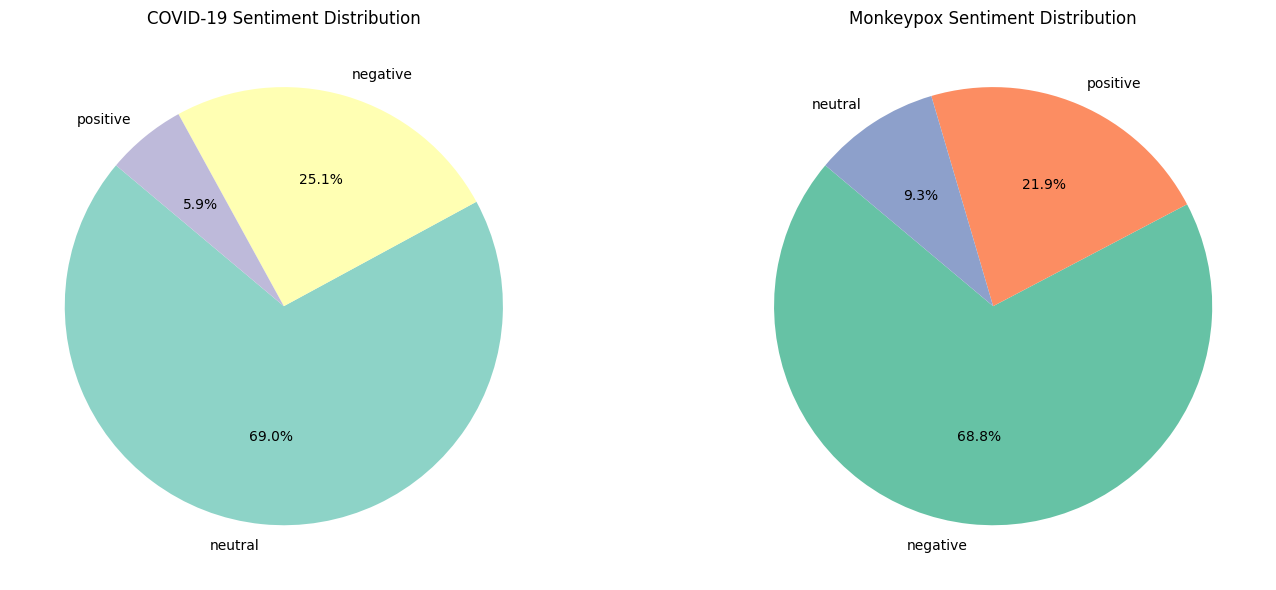


COVID-19 Sentiment Distribution:
covid_sentiment
neutral     69.018478
negative    25.081539
positive     5.899983
Name: proportion, dtype: float64

Monkeypox Sentiment Distribution:
mpox_sentiment
negative    68.811306
positive    21.852435
neutral      9.336259
Name: proportion, dtype: float64


In [19]:
import matplotlib.pyplot as plt

# Calculate sentiment distribution for both datasets
covid_sentiment_dist = covid_df['covid_sentiment'].value_counts(normalize=True) * 100
mpox_sentiment_dist = mpox_df['mpox_sentiment'].value_counts(normalize=True) * 100

# Plot the pie charts
plt.figure(figsize=(15, 6))

# COVID-19 Sentiment Pie Chart
plt.subplot(1, 2, 1)
plt.pie(covid_sentiment_dist, labels=covid_sentiment_dist.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('COVID-19 Sentiment Distribution')

# Monkeypox Sentiment Pie Chart
plt.subplot(1, 2, 2)
plt.pie(mpox_sentiment_dist, labels=mpox_sentiment_dist.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Monkeypox Sentiment Distribution')

plt.tight_layout()
plt.show()

# Print sentiment statistics
print("\nCOVID-19 Sentiment Distribution:")
print(covid_sentiment_dist)

print("\nMonkeypox Sentiment Distribution:")
print(mpox_sentiment_dist)


Mpox_DISTILROBERTA

/tmp/ipykernel_36/2754230744.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['mpox_sentiment_encoded'] = le.fit_transform(mpox_df['mpox_sentiment'])


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

I0000 00:00:1752788994.303874      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13562 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752788994.304489      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['roberta.encoder.layer.0.output.LayerNorm.bias', 'roberta.encoder.layer.2.attention.self.value.bias', 'roberta.encoder.layer.2.attention.self.value.weight', 'roberta.encoder.layer.2.attention.self.key.weight', 'roberta.encoder.layer.4.output.dense.weight', 'roberta.encoder.layer.4.attention.self.key.weight', 'roberta.encoder.layer.1.output.dense.bias', 'roberta.pooler.dense.bias', 'roberta.embeddings.LayerNorm.bias', 'roberta.encoder.layer.2.attention.output.dense.bias', 'roberta.encoder.layer.1.attention.self.key.weight', 'roberta.encoder.layer.4.attention.output.dense.weight', 'roberta.encoder.layer.2.intermediate.dense.bias', 'roberta.encoder.layer.0.output.dense.weight', 'roberta.encoder.layer.0.attention.self.key.weight', 'roberta.encoder.layer.4.attention.output.dense.bias', 'roberta.embeddings.LayerNorm.weight', 'roberta.encoder.layer.2.attention.output.Laye

Epoch 1/4


I0000 00:00:1752789024.370354     123 service.cc:148] XLA service 0x793a987af560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752789024.370951     123 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752789024.370972     123 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752789024.444610     123 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1752789024.566357     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10664/10664 [==============================] - 1429s 131ms/step - loss: 0.6041 - accuracy: 0.7571 - val_loss: 0.4931 - val_accuracy: 0.8017
Epoch 2/4
10664/10664 [==============================] - 1394s 131ms/step - loss: 0.4092 - accuracy: 0.8332 - val_loss: 0.4492 - val_accuracy: 0.8197
Epoch 3/4
10664/10664 [==============================] - 1394s 131ms/step - loss: 0.3474 - accuracy: 0.8606 - val_loss: 0.4484 - val_accuracy: 0.8239
Epoch 4/4
667/667 [==============================] - 100s 147ms/step - loss: 0.4470 - accuracy: 0.8236
Accuracy: 82.36%
667/667 [==============================] - 99s 145ms/step
Precision: 0.8176
Recall:    0.8236
F1 Score:  0.8193

Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.91      0.89     14705
     neutral       0.67      0.52      0.58      2000
    positive       0.71      0.67      0.69      4623

    accuracy                           0.82     21328
   macro avg       0.75      0.7

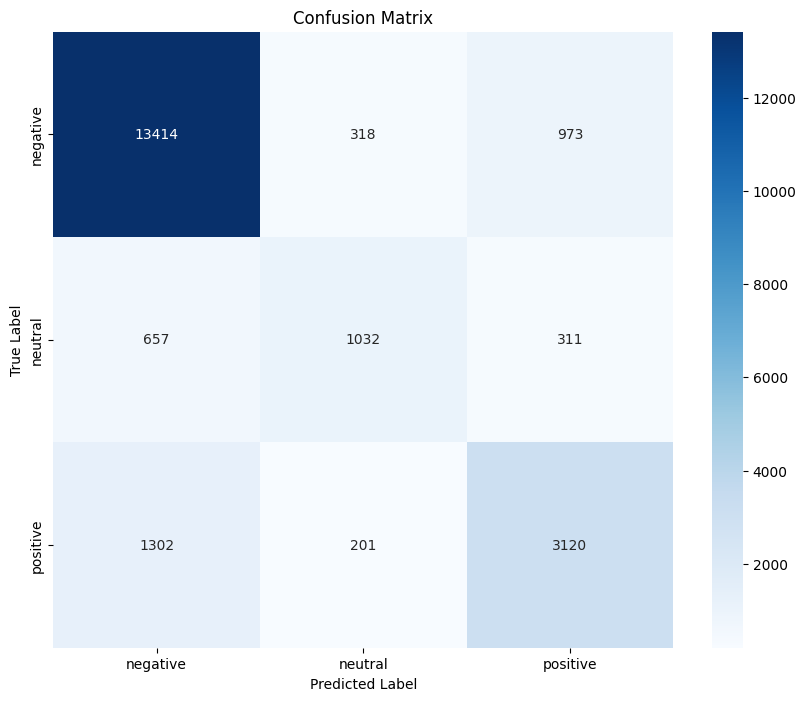

Model and tokenizer saved!


In [20]:
import pandas as pd
import tensorflow as tf
from transformers import RobertaTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'hmpv_df' is a pandas DataFrame with 'processed_text_hmpv' and 'hmpv_sentiment' columns

# Encode sentiment labels
le = LabelEncoder()
mpox_df['mpox_sentiment_encoded'] = le.fit_transform(mpox_df['mpox_sentiment'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    mpox_df['processed_text_mpox'],
    mpox_df['mpox_sentiment_encoded'],
    test_size=0.2,
    random_state=42
)

# Initialize Roberta tokenizer
tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base')

# Tokenization function
def tokenize(text_series, max_length=128):
    return tokenizer(
        list(text_series),
        padding=True,
        truncation=True,
        return_tensors='tf',
        max_length=max_length
    )

# Tokenize text
train_encodings = tokenize(X_train)
test_encodings = tokenize(X_test)

# Convert labels to tensors
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(y_test)

# Initialize DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained(
    'distilroberta-base',
    num_labels=len(le.classes_)
)

# Learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-5,
    decay_steps=1000,
    decay_rate=0.9
)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_encodings['input_ids'],
    y_train_tensor,
    validation_data=(test_encodings['input_ids'], y_test_tensor),
    epochs=4,
    batch_size=8
)

# Evaluate accuracy
loss, accuracy = model.evaluate(test_encodings['input_ids'], y_test_tensor)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Predict
y_pred_logits = model.predict(test_encodings['input_ids']).logits
y_pred = tf.argmax(y_pred_logits, axis=1).numpy()
y_true = y_test_tensor.numpy()

# Precision, Recall, F1
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save model and tokenizer
model.save_pretrained('./distilroberta_sentiment_model')
tokenizer.save_pretrained('./distilroberta_sentiment_model')

print("Model and tokenizer saved!")


You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['roberta.encoder.layer.0.output.LayerNorm.bias', 'roberta.encoder.layer.2.attention.self.value.bias', 'roberta.encoder.layer.2.attention.self.value.weight', 'roberta.encoder.layer.2.attention.self.key.weight', 'roberta.encoder.layer.4.output.dense.weight', 'roberta.encoder.layer.4.attention.self.key.weight', 'roberta.encoder.layer.1.output.dense.bias', 'roberta.pooler.dense.bias', 'roberta.embeddings.LayerNorm.bias', 'roberta.encoder.layer.2.attention.output.dense.bias', 'roberta.encoder.layer.1.attention.self.key.weight', 'roberta.encoder.layer.4.attention.output.dense.weight', 'roberta.encoder.layer.2.intermediate.dense.bias', 'roberta.encoder.layer.0.output.dense.weight', 'roberta.encoder.layer.0.attention.

Epoch 1/3
14748/14748 [==============================] - 1050s 70ms/step - loss: 0.5128 - accuracy: 0.8014 - val_loss: 0.4211 - val_accuracy: 0.8324
Epoch 2/3
14748/14748 [==============================] - 1019s 69ms/step - loss: 0.3652 - accuracy: 0.8540 - val_loss: 0.3968 - val_accuracy: 0.8436
Epoch 3/3
922/922 [==============================] - 43s 47ms/step - loss: 0.3966 - accuracy: 0.8430
Accuracy: 84.30%
922/922 [==============================] - 45s 46ms/step
Precision: 0.8391
Recall:    0.8430
F1 Score:  0.8402

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.73      0.75      7395
     neutral       0.88      0.91      0.89     20326
    positive       0.67      0.54      0.60      1774

    accuracy                           0.84     29495
   macro avg       0.77      0.73      0.75     29495
weighted avg       0.84      0.84      0.84     29495



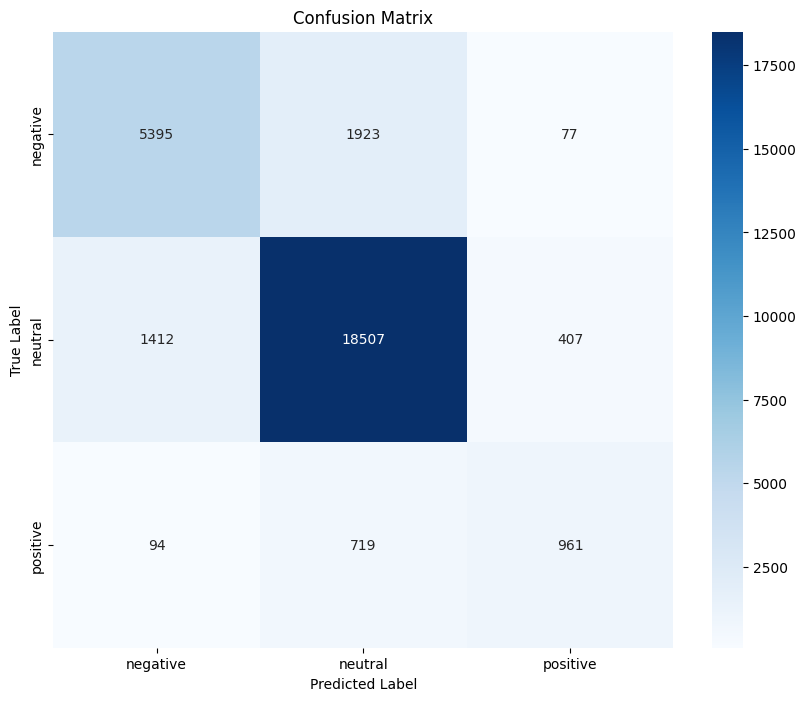

Model and tokenizer saved!


In [22]:
import pandas as pd
import tensorflow as tf
from transformers import RobertaTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'hmpv_df' is a pandas DataFrame with 'processed_text_hmpv' and 'hmpv_sentiment' columns

# Encode sentiment labels
le = LabelEncoder()
covid_df['covid_sentiment_encoded'] = le.fit_transform(covid_df['covid_sentiment'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    covid_df['processed_text_covid'],
    covid_df['covid_sentiment_encoded'],
    test_size=0.2,
    random_state=42
)

# Initialize Roberta tokenizer
tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base')

# Tokenization function
def tokenize(text_series, max_length=128):
    return tokenizer(
        list(text_series),
        padding=True,
        truncation=True,
        return_tensors='tf',
        max_length=max_length
    )

# Tokenize text
train_encodings = tokenize(X_train)
test_encodings = tokenize(X_test)

# Convert labels to tensors
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(y_test)

# Initialize DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained(
    'distilroberta-base',
    num_labels=len(le.classes_)
)

# Learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-5,
    decay_steps=1000,
    decay_rate=0.9
)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_encodings['input_ids'],
    y_train_tensor,
    validation_data=(test_encodings['input_ids'], y_test_tensor),
    epochs=3,
    batch_size=8
)

# Evaluate accuracy
loss, accuracy = model.evaluate(test_encodings['input_ids'], y_test_tensor)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Predict
y_pred_logits = model.predict(test_encodings['input_ids']).logits
y_pred = tf.argmax(y_pred_logits, axis=1).numpy()
y_true = y_test_tensor.numpy()

# Precision, Recall, F1
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save model and tokenizer
model.save_pretrained('./distilroberta_sentiment_model')
tokenizer.save_pretrained('./distilroberta_sentiment_model')

print("Model and tokenizer saved!")
